In [16]:
import numpy as np
import os
import sys
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import csv
import scipy.stats

%pylab inline

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [8]:
#check if the env variable PUIDATA exists
if os.getenv("PUIDATA") is None:
    print ("must set PUIDATA env variable")
    sys.exit()

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [9]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [10]:
citi_df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
citi_df.head()

tripduration      starttime       stoptime  start station id  \
0          1346  1/1/2015 0:01  1/1/2015 0:24               455   
1           363  1/1/2015 0:02  1/1/2015 0:08               434   
2           346  1/1/2015 0:04  1/1/2015 0:10               491   
3           182  1/1/2015 0:04  1/1/2015 0:07               384   
4           969  1/1/2015 0:05  1/1/2015 0:21               474   

        start station name  start station latitude  start station longitude  \
0          1 Ave & E 44 St               40.750020               -73.969053   
1          9 Ave & W 18 St               40.743174               -74.003664   
2     E 24 St & Park Ave S               40.740964               -73.986022   
3  Fulton St & Waverly Ave               40.683178               -73.965964   
4          5 Ave & E 29 St               40.745168               -73.986831   

   end station id             end station name  end station latitude  \
0             265     Stanton St & Chrystie St             40.722293   
1             482              W 15 St & 7 Ave             40.739355   
2             505              6 Ave & W 33 St             40.749013   
3             399  Lafayette Ave & St James Pl             40.688515   
4             432            E 7 St & Avenue A             40.726218   

   end station longitude  bikeid    usertype  birth year  gender  
0             -73.991475   18660  Subscriber      1960.0       2  
1             -73.999318   16085  Subscriber      1963.0       1  
2             -73.988484   20845  Subscriber      1974.0       1  
3             -73.964763   19610  Subscriber      1969.0       1  
4             -73.983799   20197  Subscriber      1977.0       1

In [11]:
citi_df['ageM'] = 2015 - citi_df['birth year'][(citi_df['usertype'] == 'Subscriber') & (citi_df['gender'] == 1)]
citi_df['ageF'] = 2015 - citi_df['birth year'][(citi_df['usertype'] == 'Subscriber') & (citi_df['gender'] == 2)]
len(citi_df)

285552

In [12]:
citi_df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


tripduration  start station id  start station latitude  \
count  285552.000000     285552.000000           285552.000000   
mean      654.325583        443.535006               40.735804   
std       900.775928        332.580265                0.018773   
min        60.000000         72.000000               40.680342   
25%       334.000000        308.000000               40.723627   
50%       504.000000        417.000000               40.738274   
75%       772.000000        492.000000               40.750450   
max     43023.000000       3002.000000               40.771522   

       start station longitude  end station id  end station latitude  \
count            285552.000000   285552.000000         285552.000000   
mean                -73.990177      440.337557             40.735607   
std                   0.011681      326.010259              0.018718   
min                 -74.017134       72.000000             40.680342   
25%                 -73.998102      307.000000             40.723180   
50%                 -73.990093      417.000000             40.737815   
75%                 -73.981854      492.000000             40.750200   
max                 -73.950048     3002.000000             40.771522   

       end station longitude         bikeid     birth year         gender  \
count          285552.000000  285552.000000  279924.000000  285552.000000   
mean              -73.990398   18147.291481    1974.951419       1.162485   
std                 0.011742    2065.313794      11.574637       0.419490   
min               -74.017134   14529.000000    1899.000000       0.000000   
25%               -73.998522   16355.000000            NaN       1.000000   
50%               -73.990617   18148.000000            NaN       1.000000   
75%               -73.981854   19903.000000            NaN       1.000000   
max               -73.950048   21690.000000    1999.000000       2.000000   

                ageM          ageF  
count  227764.000000  52093.000000  
mean       40.305272     38.951145  
std        11.595240     11.405112  
min        16.000000     17.000000  
25%              NaN           NaN  
50%              NaN           NaN  
75%              NaN           NaN  
max       116.000000     89.000000

In [13]:
citi_df['ageM'].dropna(inplace= True)
citi_df['ageF'].dropna(inplace= True)
len(citi_df)

285552

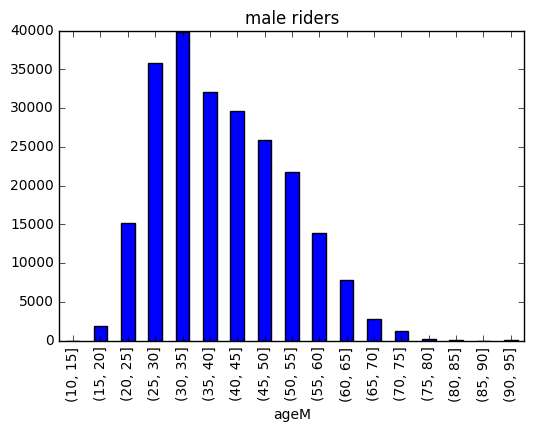

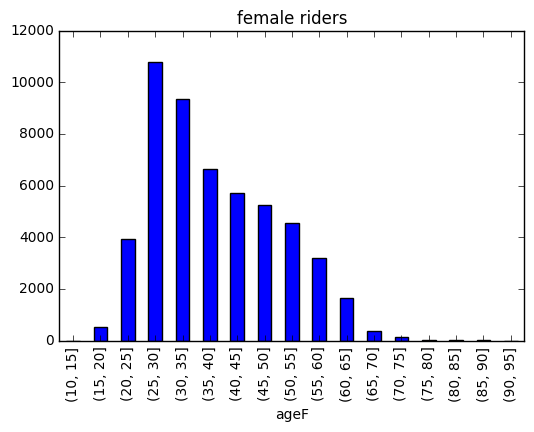

In [14]:
bins = np.arange(10, 99, 5)
axM = citi_df.ageM.groupby(pd.cut(citi_df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axM.set_title("male riders")
axF = citi_df.ageF.groupby(pd.cut(citi_df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


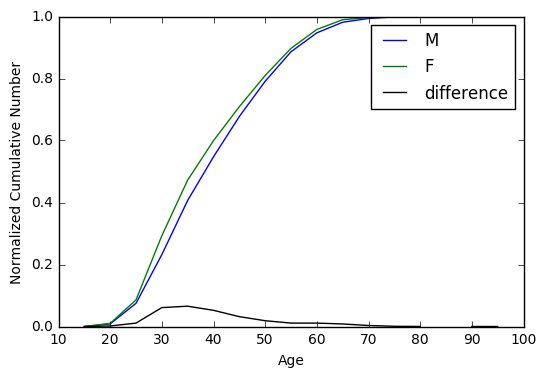

In [15]:
csM = citi_df.ageM.groupby(pd.cut(citi_df.ageM, bins)).agg([count_nonzero]).cumsum()

csF = citi_df.ageF.groupby(pd.cut(citi_df.ageF, bins)).agg([count_nonzero]).cumsum()

print(np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-', label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [34]:
ks = scipy.stats.ks_2samp(citi_df.ageM, citi_df.ageF)
print(ks)

Ks_2sampResult(statistic=0.09128675483027056, pvalue=1.1723000718567192e-307)


http://stats.stackexchange.com/questions/57885/how-to-interpret-p-value-of-kolmogorov-smirnov-test-python
https://www.graphpad.com/guides/prism/6/statistics/index.htm?interpreting_results_kolmogorov-smirnov_test.htm

#### What did the scipy KS test return?
The K-S test returns two values: the d statistic and the p value. 

The d statistic is the absolute maximum distance between the CDFs (cumulative distribution function) of the two samples. The closer this value is to zero, the more likely it is that the two samples are drawn from the same distribution. 

The p value returns answers the following question: "if the two samples were randomly sampled from identical populations, what is the probability that the two cumulative frequency distributions would be as far apart as observed? More precisely, what is the chance that the value of the Komogorov-Smirnov D statistic would be as large or larger than observed?" A small p value would lead to the conclusion that the samples had different distributions.

#### What does the return mean for the null hypothesis?
The null hypothesis for a KS test states that the distributions of the two samples are the same. Because the p value is 0.0 and because the test statistic is not close to zero, the null hypothesis can be rejected.

In [20]:
citi_df['ageM'].dropna(inplace= True)
citi_df['ageF'].dropna(inplace= True)
len(citi_df)
reducted_citi_df = citi_df[::200]
reducted_citi_df.head(10)

tripduration       starttime        stoptime  start station id  \
0             1346   1/1/2015 0:01   1/1/2015 0:24               455   
200            571   1/1/2015 1:36   1/1/2015 1:46               297   
400            364   1/1/2015 2:52   1/1/2015 2:58               284   
600            284   1/1/2015 7:02   1/1/2015 7:07               300   
800            650   1/1/2015 9:41   1/1/2015 9:52               394   
1000           581  1/1/2015 10:46  1/1/2015 10:56               466   
1200          1052  1/1/2015 11:30  1/1/2015 11:48               160   
1400           660  1/1/2015 12:05  1/1/2015 12:16               439   
1600           480  1/1/2015 12:42  1/1/2015 12:50               345   
1800          1324  1/1/2015 13:12  1/1/2015 13:35               426   

           start station name  start station latitude  \
0             1 Ave & E 44 St               40.750020   
200           E 15 St & 3 Ave               40.734232   
400     Greenwich Ave & 8 Ave               40.739017   
600    Shevchenko Pl & E 7 St               40.728145   
800         E 9 St & Avenue C               40.725213   
1000          W 25 St & 6 Ave               40.743954   
1200  E 37 St & Lexington Ave               40.748238   
1400           E 4 St & 2 Ave               40.726281   
1600          W 13 St & 6 Ave               40.736494   
1800    West St & Chambers St               40.717548   

      start station longitude  end station id          end station name  \
0                  -73.969053             265  Stanton St & Chrystie St   
200                -73.986923             394         E 9 St & Avenue C   
400                -74.002638             347  W Houston St & Hudson St   
600                -73.990214             503        E 20 St & Park Ave   
800                -73.977688             293     Lafayette St & E 8 St   
1000               -73.991449             375   Mercer St & Bleecker St   
1200               -73.978311             116           W 17 St & 8 Ave   
1400               -73.989780             382   University Pl & E 14 St   
1600               -73.997044             432         E 7 St & Avenue A   
1800               -74.013221             330       Reade St & Broadway   

      end station latitude  end station longitude  bikeid    usertype  \
0                40.722293             -73.991475   18660  Subscriber   
200              40.725213             -73.977688   18003  Subscriber   
400              40.728739             -74.007488   21664  Subscriber   
600              40.738274             -73.987520   15694  Subscriber   
800              40.730287             -73.990765   14994    Customer   
1000             40.726795             -73.996951   15552  Subscriber   
1200             40.741776             -74.001497   21113  Subscriber   
1400             40.734927             -73.992005   16780  Subscriber   
1600             40.726218             -73.983799   16266  Subscriber   
1800             40.714505             -74.005628   20087    Customer   

      birth year  gender  ageM  ageF  
0         1960.0       2   NaN  55.0  
200       1965.0       1  50.0   NaN  
400       1989.0       1  26.0   NaN  
600       1957.0       1  58.0   NaN  
800          NaN       0   NaN   NaN  
1000      1984.0       1  31.0   NaN  
1200      1955.0       1  60.0   NaN  
1400      1986.0       1  29.0   NaN  
1600      1982.0       1  33.0   NaN  
1800         NaN       0   NaN   NaN

In [33]:
reducted_citi_df['ageM'].dropna(inplace= True)
reducted_citi_df['ageF'].dropna(inplace= True)
ks_2 = scipy.stats.ks_2samp(reducted_citi_df.ageM, reducted_citi_df.ageF)
print(ks_2)

Ks_2sampResult(statistic=0.10841998568198413, pvalue=0.015689150327056155)


#### H0: The null hypothesis for KS tests states that the distributions of the two samples are the same

#### HA: The alternative hypothesis states that the distributions of two samples are not the same

Given the low pvalue, I reject the null hypothesis

In [24]:
men = sorted(citi_df.ageM)
print(len(men))
#print(227764/52093)

men_2 = men[::4]
men_3 = men_2[2424:(len(men_2)-2424)]

227764


In [25]:
women = sorted(citi_df.ageF)
print(len(women))

52093


In [26]:
#determines the degree to which a relationship is linear
#draws a line of best fit through the data of two variables, where the correlation coefficient, r, indicates how 
#far away all these points are to the line of best fit
#must be ordered by age - either largest to smallest or smallest to largest
#must be grouped by gender
pearson = scipy.stats.pearsonr(men_3, women)
print(pearson)

(0.9946026649750308, 0.0)


#### H0: There is no linear relationship between the age of men and the age of women, r = 0

#### HA: There is a linear relationship between the age of men and the age women,  r != 0

Given the correlation coefficient value of .9946 and the p value of 0.0, I reject the null hypothesis. 

In [27]:
spearman_df = pd.DataFrame()
spearman_df['sorted_men'] = men_3
spearman_df['sorted_women'] = women
spearman_df.head()

sorted_men  sorted_women
0        24.0          17.0
1        24.0          17.0
2        24.0          17.0
3        24.0          17.0
4        24.0          17.0

In [28]:
#correlation coefficient is a nonparametric measure of the strength and direction of association that exists 
#between two variables measured on at least an ordinal scale
spearman = scipy.stats.spearmanr(spearman_df)
print(spearman)

SpearmanrResult(correlation=0.99916093558745944, pvalue=0.0)


The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the ranked variables.

#### H0: There is no relationship between the ranks of the age of men and the age of women

#### HA: There is a relationship between the ranks of the age of men and the age women

Given the correlation coefficient value of .999 and the p value of 0.0, I reject the null hypothesis. 